In [1]:
from brian2 import *

INFO       Cache size for target "cython": 1472 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/maria/.cython/brian_extensions" directory. [brian2]


In [2]:
clear_cache('cython')

In [10]:
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

#M = StateMonitor(G, 'v', record=0)
#run(50*ms)
#plot(M.t/ms, M.v[0])
#xlabel('Time (ms)')
#ylabel('v')

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_2')


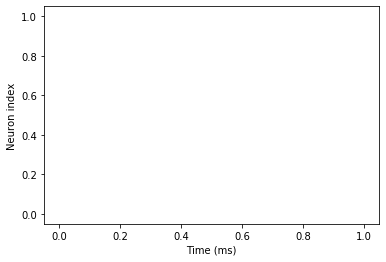

In [31]:
class CalciumMonitor(SpikeMonitor):
    def __init__(self,source):
        SpikeMonitor.__init__(self,source)
        print(source)


N = 100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'
c=CalciumMonitor(G)

plot(c.t/ms, c.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');